C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[[15373  1219]
 [ 2034  3190]]


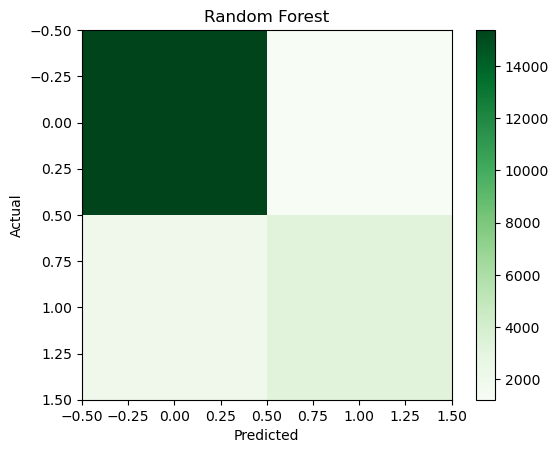

Random Forest
Accuracy: 0.8508892555922258
Precision: 0.723520072578816
Recall: 0.6106431852986217
F1 score: 0.6623066542094882


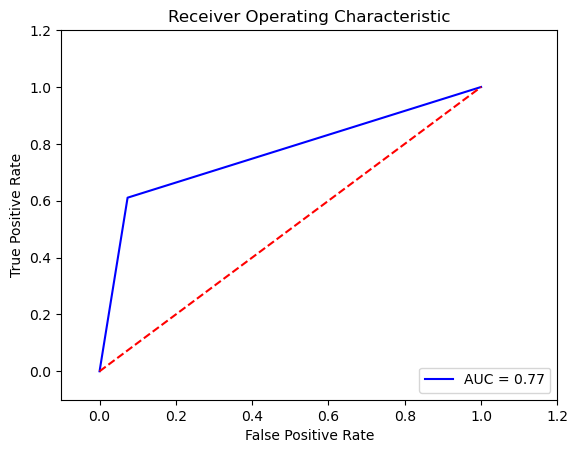

[0.         0.07346914 1.        ]
[0.         0.61064319 1.        ]


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

def plot_graphs(y_test, y_pred, title):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot the confusion matrix
    plt.imshow(cm, cmap='Greens')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.colorbar()
    plt.show()

    # Print the mean, variance and f1 score
    print(title)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Print the accuracy, precision, recall and f1 score
    print(f'Accuracy: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {rec}')
    print(f'F1 score: {f1}')

    return acc, prec, rec, f1

def train_evaluate_random_forest(csv_file):
    # Load the data from CSV
    data = pd.read_csv(csv_file)

    # Prepare the data
    X = data.drop('class', axis=1)
    y = data['class']

    # Perform one-hot encoding on categorical columns
    categorical_columns = X.select_dtypes(include='object').columns
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
    X_encoded.columns = encoder.get_feature_names_out(categorical_columns)
    X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)

    # Convert labels to numeric format
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.67, random_state=42)

    # Building the Classifier
    random_forest = RandomForestClassifier(random_state=50)

    # Training
    random_forest.fit(X_train, y_train)

    # Predictions
    y_randomforest_predictions = random_forest.predict(X_test)

    acc, prec, recall, f1 = plot_graphs(y_test, y_randomforest_predictions, 'Random Forest')

    return acc, prec, recall, f1, y_test, y_randomforest_predictions

acc, prec, recall, f1, y_test, y_pred = train_evaluate_random_forest('combined.csv')

# Calculate ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(false_positive_rate)
print(true_positive_rate)
